In [30]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
from control.matlab import *
from numba import float32, float64, jit, NumbaPerformanceWarning
import warnings

warnings.simplefilter('ignore', category=NumbaPerformanceWarning)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=11
plt.rcParams['ytick.labelsize']=11
plt.rcParams['axes.grid']=True
plt.rcParams['axes.xmargin']=0

In [31]:
Ts = 0.1; Fs = 1/Ts

In [32]:
s = tf('s')
m1 = 1
m2 = 0.5
c1 = 0.2
c2 = 0.5
k1 = 1
k2 = 0.5

In [33]:
P = ( m1*s**2 + (c1+c2)*s + (k1+k2) ) / ( (m1*s**2 + (c1+c2)*s + k1+k2)*(m2*s**2+c2*s+k2) - (k2+c2*s)**2 )

In [38]:
T = 200
t = np.arange(0, T, Ts)
u = np.random.normal(0, 10, t.shape)
# T_u = 50 # s
# u = np.zeros(t.shape)
# u[(t >= 0*T_u/2) & (t < 1*T_u/2)] = 1
# u[(t >= 2*T_u/2) & (t < 3*T_u/2)] = 1
# u[(t >= 4*T_u/2) & (t < 5*T_u/2)] = 1
# u[(t >= 6*T_u/2) & (t < 7*T_u/2)] = 1

C:\Users\ricca\anaconda3\envs\sysid-transformers-control\Lib\site-packages\control\timeresp.py:940: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


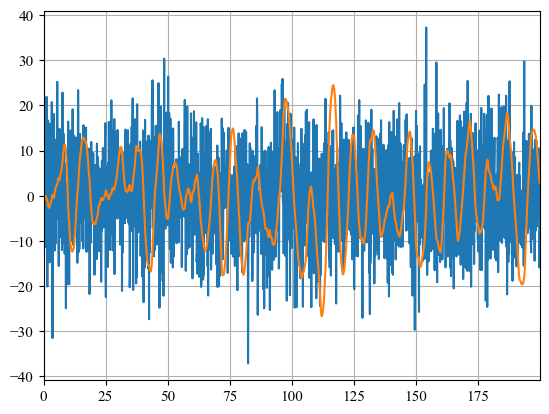

In [40]:
y, _, _ = lsim(P, u, t)
plt.plot(t, u)
plt.plot(t, y)